In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, r"C:\Inicio_dev\sysver\PyVerify")

In [3]:
from pverify.drivers.SMU.ke2400.ke2400 import *

Sending statpro information about feature: pyverify_import


In [4]:
s = ke2400()
s.Initialize("GPIB0::24::INSTR", True, True)
c = s.GetChannel(1)

In [5]:
s.GoToLocal()

# Quick Setup

In [6]:
c.SourceMeterSetup(Source="voltage", Measure="voltage",    Performance=0)

In [7]:
c.SourceMeterSetup(Source="voltage", Measure="current",    Performance=1)

In [8]:
c.SourceMeterSetup(Source="voltage", Measure="resistance", Performance=2)

In [9]:
c.SourceMeterSetup(Source="current", Measure="voltage",    Performance=4)

In [10]:
c.SourceMeterSetup(Source="current", Measure="current",    Performance=5)

In [11]:
c.SourceMeterSetup(Source="current", Measure="resistance", Performance=6)

In [12]:
s.CheckError()

# Source Voltage, Measure Voltage

In [13]:
c.SourceMeterSetup(Source="voltage", Measure="voltage", Performance=3)

In [14]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10)

In [15]:
c.Source.Voltage.SetCurrentLimit(0.2)

In [16]:
c.Source.SetOutputEnabled(True)

In [17]:
print(c.Measure.Read())  # Returns the sourced and measured value

[4.999471, 4.999471]


In [18]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))

[4.999471, 'Volt DC']


In [19]:
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[4.999471, 'Volt DC']


In [20]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Voltage, Measure Current

The performance parameter pre-configures NPLC, Resolution, AutoZeroState and Averaging

In [21]:
c.SourceMeterSetup(Source="voltage", Measure="current", Performance=3)

In [22]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10)

In [23]:
c.Source.Voltage.SetCurrentLimit(0.05)

In [24]:
c.Measure.Current.ConfigureMeasurement(Range=0.05)

In [25]:
c.Source.SetOutputEnabled(True)

In [26]:
print(c.Measure.Read())  # Returns the sourced and measured value

[4.999481, 0.005006788]


In [27]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))  # Fetch data from the previous measurement done by Read()
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[4.999481, 'Volt DC']
[0.005006788, 'Amp DC']


In [28]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Voltage, Measure Resistance

In [29]:
c.SourceMeterSetup(Source="voltage", Measure="resistance", Performance=3)

In [30]:
c.Source.Voltage.ConfigureSource(Amplitude=5, Range=10)

In [31]:
c.Measure.Current.ConfigureMeasurement(Range=0.05)

In [32]:
c.Source.SetOutputEnabled(True)

In [33]:
print(c.Measure.Read())  # Returns the sourced and measured value

[4.99951, 998.5085]


In [34]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[4.99951, 'Volt DC']
[998.5085, 'Ohm']


In [35]:
c.Source.Voltage.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Voltage

In [36]:
c.SourceMeterSetup(Source="current", Measure="voltage", Performance=3)

In [37]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1)

In [38]:
c.Source.Current.SetVoltageLimit(20)

In [39]:
c.Measure.Voltage.ConfigureMeasurement(Range=20)

In [40]:
c.Source.SetOutputEnabled(True)

In [41]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.02005609, 19.99931]


In [42]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.02005609, 'Amp DC']
[19.99931, 'Volt DC']


In [43]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Current

In [44]:
c.SourceMeterSetup(Source="current", Measure="current", Performance=3)

In [45]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1)

In [46]:
c.Source.SetOutputEnabled(True)

In [47]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.02006456, 0.02006456]


In [48]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.02006456, 'Amp DC']
[0.02006456, 'Amp DC']


In [49]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# Source Current, Measure Resistance

In [50]:
c.SourceMeterSetup(Source="current", Measure="resistance", Performance=3)

In [51]:
c.Source.Current.ConfigureSource(Amplitude=0.05, Range=1)

In [52]:
c.Source.Current.SetVoltageLimit(20)

In [53]:
c.Measure.Voltage.ConfigureMeasurement(Range=20)

In [54]:
c.Source.SetOutputEnabled(True)

In [55]:
print(c.Measure.Read())  # Returns the sourced and measured value

[0.0200391, 998.0125]


In [56]:
print(c.Measure.Fetch(BufferElements="SOUR, SOURUNIT"))
print(c.Measure.Fetch(BufferElements="READ, UNIT"))

[0.0200391, 'Amp DC']
[998.0125, 'Ohm']


In [57]:
c.Source.Current.ConfigureSource(Amplitude=0)
c.Source.SetOutputEnabled(False)

# DirectIO

In [58]:
s.DirectIO.Write("*IDN?")
print(s.DirectIO.Read())

KEITHLEY INSTRUMENTS INC.,MODEL 2400,0822568,C21   Nov  7 2000 12:51:38/A02  /H/H



In [59]:
print(s.DirectIO.Query("*IDN?"))

KEITHLEY INSTRUMENTS INC.,MODEL 2400,0822568,C21   Nov  7 2000 12:51:38/A02  /H/H


# Trigger Models

In [60]:
c.SourceMeterSetup(Source="voltage", Measure="voltage", Performance=3)
c.Source.Voltage.SetCurrentLimit(0.1)
c.Source.SetOutputEnabled(True)

## Trigger Models - Simple Loop

In [ ]:
s.Trigger.ConfigureSimpleLoopTrigger(Count=10, Delay=0.05)

## Trigger Models - Duration Loop

In [ ]:
s.Trigger.ConfigureDurationLoopTrigger(Duration=2, Delay=0.05)

## Trigger Models - Sweeps

In [61]:
c.Source.Voltage.ConfigureLinearSweep(Start=0, Stop=5, Points=20, Delay=0.05)

In [ ]:
c.Source.Voltage.ConfigureLinearSweepStep(Start=0, Stop=5, Step=0.1, Delay=0.05)

In [ ]:
c.Source.Voltage.ConfigureLogarithmicSweep(Start=0.01, Stop=5, Points=20, Delay=0.05)

In [ ]:
c.Source.Voltage.ConfigureListSweep(Values=[0, 1, 2, 3, 4, 5], Ranges=None, Delay=0.2)

## Trigger Models - Initiate and get waveforms

In [62]:
s.Trigger.Initiate()
s.Trigger.Wait4Idle(10)
print(c.Measure.Fetch("SOUR"))

[-3.158679e-05, 0.2630568, 0.5262309, 0.7893702, 1.052574, 1.31574, 1.57885, 1.841972, 2.105267, 2.368067, 2.630767, 2.894032, 3.157613, 3.420864, 3.684123, 3.948053, 4.210889, 4.473719, 4.736792, 4.999523]


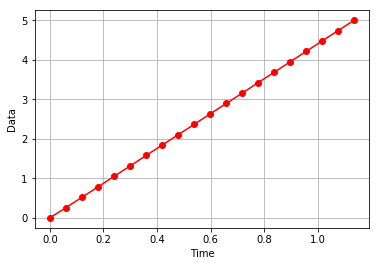

In [63]:
c.Measure.Trace.GetSourceWaveform().plot("ro-")

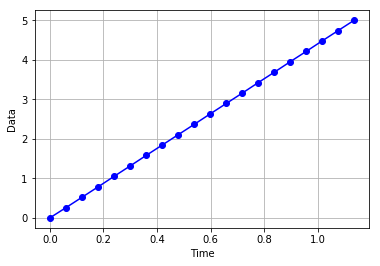

In [64]:
c.Measure.Trace.GetReadingWaveform().plot("bo-")

In [65]:
print("Average:   %s" % c.Measure.Trace.GetAverageReading())
print("Maximum:   %s" % c.Measure.Trace.GetMaximumReading())
print("Minimum:   %s" % c.Measure.Trace.GetMinimumReading())
print("Peak2Peak: %s" % c.Measure.Trace.GetPeak2PeakReading())
print("SDev:      %s" % c.Measure.Trace.GetSDevReading())

Average:   2.49987356566
Maximum:   4.999523
Minimum:   -3.158679e-05
Peak2Peak: 4.99955458679
SDev:      1.51746032188


In [66]:
c.Measure.Trace.GetData(BufferElements="REL, READ", Transposed=1)

[[0.0,
  0.06100000000014916,
  0.12100000000009459,
  0.18100000000004002,
  0.23999999999978172,
  0.29999999999972715,
  0.3589999999999236,
  0.41899999999986903,
  0.47899999999981446,
  0.5389999999997599,
  0.5979999999999563,
  0.6579999999999018,
  0.7179999999998472,
  0.7770000000000437,
  0.8369999999999891,
  0.8959999999997308,
  0.956000000000131,
  1.0149999999998727,
  1.074999999999818,
  1.1349999999997635],
 [-3.158679e-05,
  0.2630568,
  0.5262309,
  0.7893702,
  1.052574,
  1.31574,
  1.57885,
  1.841972,
  2.105267,
  2.368067,
  2.630767,
  2.894032,
  3.157613,
  3.420864,
  3.684123,
  3.948053,
  4.210889,
  4.473719,
  4.736792,
  4.999523]]